# MNIST Digit Classification using Artificial Neural Network (ANN)

This project aims to classify handwritten digits (0–9) using a Deep Learning model built with TensorFlow and Keras. The model is trained on the MNIST dataset and achieves high accuracy on unseen test data.

## Import Required Libraries

In this section, we import necessary libraries for:
- Data handling (NumPy)
- Visualization (Matplotlib, Seaborn)
- Deep Learning model building (TensorFlow / Keras)
- Evaluation metrics (Scikit-learn)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## Load MNIST Dataset

The MNIST dataset contains 70,000 grayscale images of handwritten digits.
Each image is 28x28 pixels.

The dataset is divided into:
- 60,000 training images
- 10,000 testing images

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## Data Preprocessing (Normalization)

Pixel values range from 0 to 255.
To improve neural network performance, we scale values between 0 and 1 by dividing by 255.

This helps the model train faster and more efficiently.

In [ ]:
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)

print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


## Visualizing Sample Images

Before training the model, we visualize some handwritten digit images from the dataset to understand the structure and pixel representation.

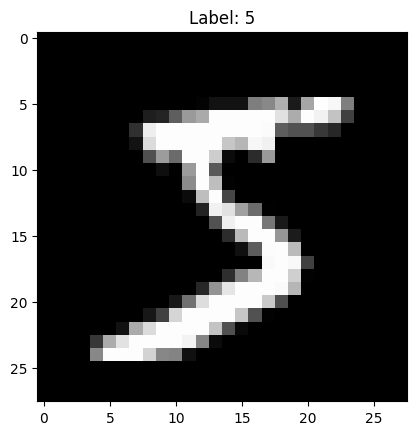

In [ ]:
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

## Building the Neural Network Model

We build a Sequential Artificial Neural Network consisting of:

- Input Layer (28x28 pixels)
- Flatten Layer (Converts 2D image to 1D vector)
- Hidden Layer 1 (128 neurons, ReLU activation)
- Hidden Layer 2 (64 neurons, ReLU activation)
- Output Layer (10 neurons, Softmax activation)

The Softmax function outputs probability scores for digits 0–9.

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
model = keras.Sequential([
    keras.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

## Compiling the Model

The model is compiled using:

- Optimizer: Adam
- Loss Function: Sparse Categorical Crossentropy
- Evaluation Metric: Accuracy

This configuration is suitable for multi-class classification problems.

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Training the Model

The model is trained for 5 epochs using 90% of training data.
10% of the training data is used for validation.

During training, the model learns patterns such as curves, edges, and shapes that distinguish different digits.

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    validation_split=0.1
)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8706 - loss: 0.4389 - val_accuracy: 0.9623 - val_loss: 0.1275
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9669 - loss: 0.1108 - val_accuracy: 0.9767 - val_loss: 0.0831
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9771 - loss: 0.0744 - val_accuracy: 0.9777 - val_loss: 0.0844
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9829 - loss: 0.0547 - val_accuracy: 0.9732 - val_loss: 0.0922
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9867 - loss: 0.0427 - val_accuracy: 0.9800 - val_loss: 0.0729


## Model Evaluation on Test Data

After training, the model is evaluated on unseen test data to measure its real-world performance.

Test Accuracy Achieved: 97.8%

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9732 - loss: 0.0903
Test Accuracy: 0.9779999852180481


## Sample Prediction

The trained model is used to predict individual digit images from the test dataset.

Example:
Predicted Digit: 7
Actual Digit: 7

This demonstrates that the model correctly classifies unseen handwritten digits.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted Label: 7
Actual Label: 7


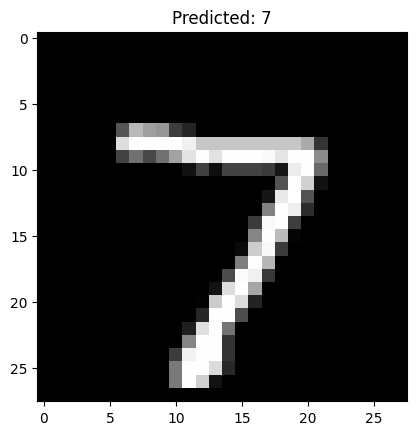

In [ ]:
predictions = model.predict(X_test)

predicted_label = np.argmax(predictions[0])

print("Predicted Label:", predicted_label)
print("Actual Label:", y_test[0])

plt.imshow(X_test[0], cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.show()

## Confusion Matrix

A confusion matrix is generated to analyze model performance across all digit classes.

The diagonal values represent correct predictions.
Off-diagonal values represent misclassifications.

The model performs strongly across all digits with minimal confusion.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


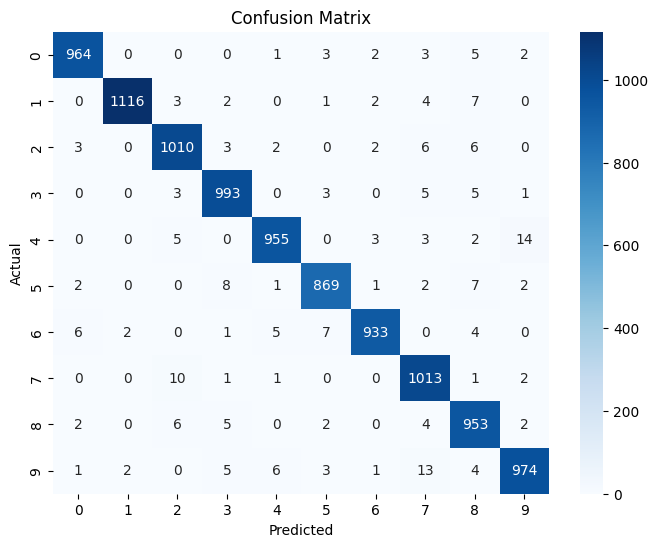

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(model.predict(X_test), axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Conclusion

In this project, we successfully built an Artificial Neural Network to classify handwritten digits using the MNIST dataset.

The model achieved:
- Training Accuracy: ~98.6%
- Validation Accuracy: ~98.0%
- Test Accuracy: ~97.8%

This project demonstrates the effectiveness of deep learning in image classification tasks.